In [236]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [237]:
rd.seed(0)
np.random.seed(0)  #no habia inicializado la semilla del random NUMPY
t=np.arange(0.0,5.0,0.1)
noise = np.random.uniform(0,15, t.size)
s=t**3+t**2+noise
#s=5*np.sin(t)+noise # pueden probar otra función, por ejemplo este cachito de senoidal pongan una desviacion estandar por ejemplo 5 en la vairable NOISE


In [238]:
maxi=np.amax(t)
t=t/maxi            #normalizacion de los datos... agregado para poder usar polinomios de mayor grado sin que se desborden las variables
                    #era algo que iba a mostrarles una vez que funcionara...

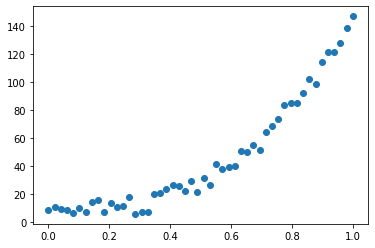

In [239]:
plt.plot(t,s,'o')
plt.show()

In [240]:
alpha=0.1
epocas=100
grado= 9
w=np.zeros(grado)
grad=np.zeros(grado)
e=np.zeros(epocas)


In [241]:
for i in range (grado): #inicializar los pesos
  w[i]=rd.random()


In [242]:
#ahora si empezamos
for i in range(epocas):
  error=0
  for j in range(t.size):
    hipo =0 
    for k in range(grado):
      hipo += w[k]*(t[j]**k)
    error = error+((hipo-s[j])**2)

    for k  in range(grado):
      grad[k]=grad[k]+(hipo-s[j])*(t[j]**k)
     #actualizar pesos, esta es la parte de "aprendizaje"

    for k in range(grado):
      w[k]=w[k]-alpha*(grad[k]/t.size) 
    grad=np.zeros(grado)
    e[i]=error/t.size

In [243]:
#evaluar mi función con todos los ejemplos 

val=np.zeros(t.size)
for i in range(t.size):
  for k in range(grado):
    val[i]= val[i] + w[k]*t[i]**k  #acá estuvo el error...no multipliqué por los pesos al momento de evaluar

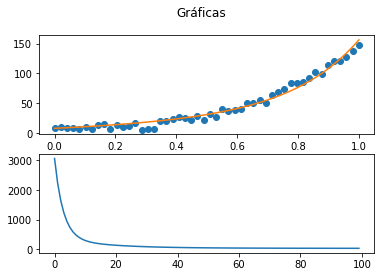

In [244]:
fig, axs = plt.subplots(2)
fig.suptitle("Gráficas")

axs[0].plot(t,s, 'o')
axs[0].plot(t,val)
axs[1].plot(e)
plt.show()